<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [5]:
import numpy as np
import tensorflow as tf 
path = '/Users/don/Desktop/u4w2/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz'
data = np.load(path)
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [6]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

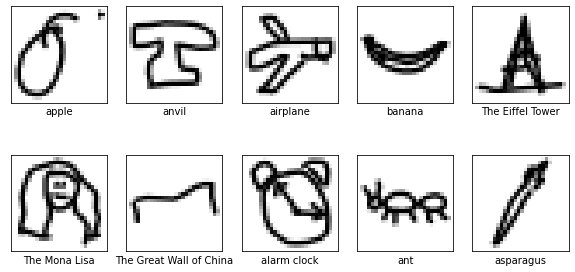

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [8]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

baseline = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 4s 2ms/step - loss: 4.5651 - accuracy: 0.2270 - val_loss: 1.7354 - val_accuracy: 0.3596
Epoch 2/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.6100 - accuracy: 0.3947 - val_loss: 1.4681 - val_accuracy: 0.4409
Epoch 3/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.4204 - accuracy: 0.4598 - val_loss: 1.3738 - val_accuracy: 0.4829
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3364 - accuracy: 0.4963 - val_loss: 1.2733 - val_accuracy: 0.5572
Epoch 5/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.2468 - accuracy: 0.5438 - val_loss: 1.2079 - val_accuracy: 0.5671
Epoch 6/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.2036 - accuracy: 0.5686 - val_loss: 1.1733 - val_accuracy: 0.5899
Epoch 7/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1825 - accuracy: 0.5797 - val_loss: 1.1924 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [16]:
baseline.history

{'loss': [2.341984987258911,
  1.563536524772644,
  1.4083476066589355,
  1.3169835805892944,
  1.2481242418289185,
  1.2063935995101929,
  1.1857757568359375,
  1.1790205240249634,
  1.162182092666626,
  1.1496520042419434,
  1.1452397108078003,
  1.1426522731781006,
  1.1361254453659058,
  1.1335173845291138,
  1.1225056648254395,
  1.1135544776916504,
  1.1165584325790405,
  1.1138540506362915,
  1.1057605743408203,
  1.1011985540390015,
  1.094314694404602,
  1.0840896368026733,
  1.0691940784454346,
  1.0548099279403687,
  1.049385905265808,
  1.0412919521331787,
  1.0404212474822998,
  1.0390857458114624,
  1.0342388153076172,
  1.0367122888565063],
 'accuracy': [0.28497499227523804,
  0.41058748960494995,
  0.47072499990463257,
  0.5115749835968018,
  0.5499374866485596,
  0.5698000192642212,
  0.5782874822616577,
  0.5885499715805054,
  0.616937518119812,
  0.622487485408783,
  0.6216375231742859,
  0.6249250173568726,
  0.6280875205993652,
  0.6291875243186951,
  0.63437497615

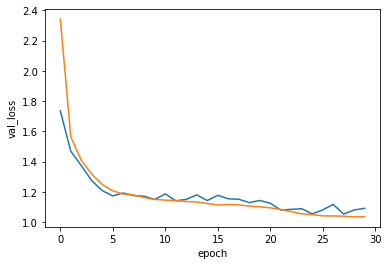

In [19]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [21]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sgdbaseline = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 4s 2ms/step - loss: 26.9932 - accuracy: 0.1023 - val_loss: 2.3039 - val_accuracy: 0.1001
Epoch 2/30
2500/2500 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3040 - val_accuracy: 0.0961
Epoch 3/30
2500/2500 [==============================] - 3s 1ms/step - loss: 2.3020 - accuracy: 0.1013 - val_loss: 2.3039 - val_accuracy: 0.0993
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.0991 - val_loss: 2.3040 - val_accuracy: 0.0985
Epoch 5/30
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3025 - accuracy: 0.0969 - val_loss: 2.3039 - val_accuracy: 0.0961
Epoch 6/30
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3039 - val_accuracy: 0.0961
Epoch 7/30
2500/2500 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3041 - val_accuracy

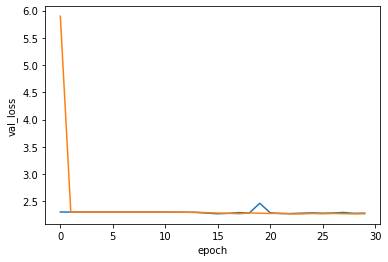

In [22]:
df = pd.DataFrame.from_records(sgdbaseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [25]:
y[:10]

array([0, 6, 3, 1, 7, 5, 7, 0, 1, 4])

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

1. i used 'sparse_categorical_crossentropy' because it's a multi-classification problem & my target is label encoded

2. the loss function is used for optimization, it computes the quantity the model is seeking to minimize during training. a metric is used to evaluate the performance of the model. pretty much only used by me and has nothing to do with the training/optimization process.

3. Gradient descent in general: update each parameter of a model, observe how a change would affect the objective function, choose a direction for low error rate, and continue iterating until the objective function converges to the minimum.
SGD is a variant of gradient descent. It computes on a small subset/ random sample of data. SGD has same performance as regular gradient descent when learning rate is low.
ADAM: algorithm for gradient-based optimization stochastic objective functions (stochastic= randomly distributed). combines root mean squared error propagation and adaptive gradient algorithm to compute individual adaptive learning rates for different parameters. adam can handle sparse gradients and noise, and is easy to configure. faster than SGD.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)